<a href="https://colab.research.google.com/github/Paavani-git/Machine_Learning/blob/main/Pavani_Labsheet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Labsheet 5- Principal Component Analysis

##Background
### Principal Component Analysis
It can be defined as orthogonal projection of the data onto a lower dimensional linear space, known as principal subspace,such that variance of the projected data is maximized.

Instead of using D components, let us say, if we use M components, i.e,
M eigen vectors (corresponding to the M largest eigen values), then we can approximate the signal as:- 
$$X = \sum _{i=1}^{M}(x^T w_i)w_i$$

Let there be a D dimensional feature vector x that is reduced to M dimen-
sions.
Sum of top M eigen values of Σ is represented as $\lambda_1 + \lambda_2 + ...... + 	\lambda_M$ .
Sum of all eigen values (trace) from λ 1 to λ D , which effectively would give
the trace of the covariance matrix, is represented as $\lambda_1 + \lambda_2 + ...... + 	\lambda_M +.....λ_D$.

$$V = \frac{\lambda_1 + \lambda_2 + ...... + 	\lambda_M}{\lambda_1 + \lambda_2 + ...... + 	\lambda_M+.....λ_D}*100$$
##Applications Of PCA
Dimensionality reduction, lossy data compression, feature extraction and data visualization


### Approximate signal after reduction to lower dimension
Choose a new direction that maximize the projected variance and orthogonal to those already considered.
where the k columns of W are the k leading eigenvectors of S, the esti mator to Σ. We subtract the sample mean m from x before projection to center the data on the origin. After this linear transformation, we get to a k-dimensional space whose dimensions are the eigvectors, and the variances over these new dimensions are equal to the genvalues


## Question
The gallery folder ***‘Gallery’*** contains images from 40 individuals, each of them providing 5 images. The pixel intensities of the 200 face images will be used for computing the Principal Components.



1.  Display the Eigenface images corresponding to the top 5 Eigen values of the
covariance matrix $\boldsymbol{\Sigma}$
2.   Plot a graph depicting the percentage of the total variance of the original data retained in the reduced space versus the number of dimensions. From this graph, find the number of dimensions required for projecting the face vectors so that:


*   At least 85% of the total variance of the original data is accounted for in
the reduced space
*  At least 95% of the total variance of the original data is accounted for in
the reduced space



3.   Reconstruct the image **‘face input 1.pgm’** using the:



*  Eigenface corresponding to the largest eigenvalue.
*  Top 4 Eigenfaces
*  Top 15 Eigenfaces
*  Top 150 Eigenfaces
*  All the Eigenfaces

Display the reconstructed image in each case.

4. Repeat part 3 for the image **‘face input 2.pgm’**. Comment on your result.







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def imagepath(path):
  cv_img = []
  array_1 = []
  for img in range(len(path)):
    n = cv.imread(path[img])
    n = cv.cvtColor(n, cv.COLOR_BGR2GRAY)            #RGB to GRAY SCALE IMAGE CONVERSION 
    p = np.array(n)
    a = p/255                   #normalization
    array_1.append(a)
  return (np.array(array_1))

In [ ]:
def mean():
  mean=np.zeros((1,10304))
  u = []
  for i in range(200):
    mean=mean+A[i][:]
  u.append(mean/200.0)
  u = u[0]
  return(u)

In [ ]:
import glob
import cv2 as cv
from glob import glob
import numpy as np
import cv2 as cv

img_path = "/content/drive/MyDrive/ml/Labsheet 5/Gallery/*"
paths = glob(img_path+'*')
image_paths = []
person_wise = []
A = []

for i in range(len(paths)):
  person_wise.append(glob(paths[i] + '/*'))               #for each image
  image_paths = image_paths + glob(paths[i] + '/*')

for i in range(len(image_paths)):
  image = cv.imread(image_paths[i])

  
  n = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 
  n = n/255.0 
  a = []
  for j in range(112):
    for k in range(92):
      a.append(n[j][k])
  A.append(a)

mean = mean()
x = np.zeros((200,10304))
for i in range(200):
  x[i]=-(A[i][:]-mean)       #subtract mean vector with for each row
 
covar = np.dot(x,x.T)           #easier to find when we compare with (x.T,x) 


# N - no.of examples (200)
# D - dimension(10304)
 

(10304, 200)


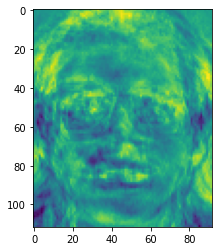

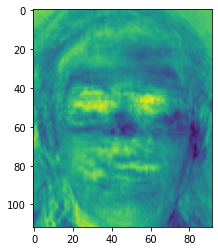

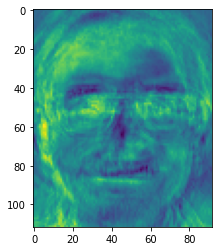

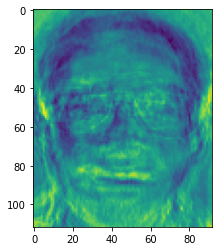

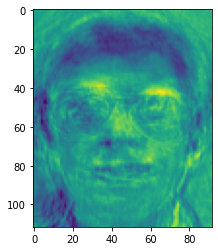

In [ ]:
#question1 
from numpy import linalg as LA
import matplotlib.pyplot as plt

w,v = LA.eig(covar)                   #w=value,v=vector
index = np.argsort(w[::-1])         

B = np.zeros((10304,200))
for i in range(200):
  B[:,i] = np.dot((x.T),v[i])         #actual eigen vectors 

project = np.zeros((10304,200))
for i in range(200):
  project[:,i]=B[:,i]/LA.norm(B[:,i])                

sorted_eigenvectors = np.zeros((10304,200))
for i in range(200):
  sorted_eigenvectors[:,i] = project[:,index[i]]
# final_eigen = []
# for i in range(200):
# print(np.shape(sorted_eigenvectors))
# print(np.shape(B))
for i in range(5):
  plt.figure(i+1)
  pt = np.reshape(sorted_eigenvectors[:,i],(112,92))
  plt.imshow(pt)
print(np.shape(B))

### Amount of variance is preserved 
**steps:**
1.  sort eigen values in desending order 
2. if project M dim. to D dim. => take sum of top M eigen values/sum of all eigen values


[47, 110]


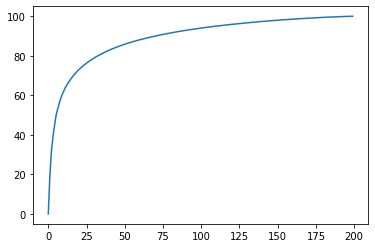

In [ ]:
# Write code for Question 2 here 
sorted_eigenvalues = np.sort(w)[::-1]
a= 0
V = []
indices = []
f1,f2 = 0,0 
for i in range(200):
  a = a+ w[i]                      #total sum
for i in range(200):
  V.append((sum(sorted_eigenvalues[:i])/a)*100 )
  if ((sum(sorted_eigenvalues[:i])/a)*100 >= 85 and f1==0):
    indices.append(i)
    f1 = 1

  if ((sum(sorted_eigenvalues[:i])/a)*100 >= 95 and f2==0):
    indices.append(i)
    f2 = 1
print(indices)
x=np.arange(0,200)
y=np.array(V)
plt.plot(x,y)


Choose a new direction that maximize the projected variance and orthogonal to those already considered.

$$z = {W^T}(x-m)$$
where the k columns of W are the k leading eigenvectors of S, the esti mator to Σ. We subtract the sample mean m from x before projection to center the data on the origin. After this linear transformation, we get to a k-dimensional space whose dimensions are the eigvectors, and the variances over these new dimensions are equal to the genvalues

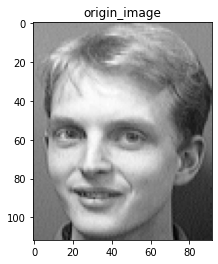

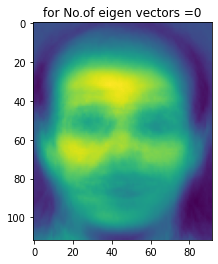

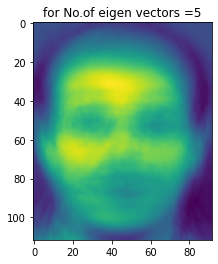

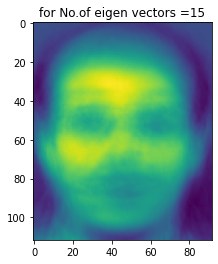

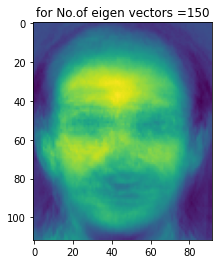

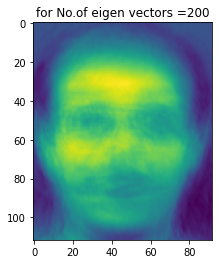

In [ ]:
# Write code for Question 3 here 
image = cv.imread("/content/drive/MyDrive/ml/Labsheet 5/face_input_1.pgm")
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image = image/255.0

plt.imshow(image, "gray")
plt.title("origin_image")
plt.show()

image_with_mean = image.reshape((1,image.shape[0]*image.shape[1]))
image_mean_center = image_with_mean - mean
vec = [0,5,15,150,200]
c = 0
for i in vec:
  for j in range(i):
    x1=np.zeros((112,92))
    x1 = x1+np.dot(image_mean_center,sorted_eigenvectors[:,j])*(sorted_eigenvectors[:,[j]].reshape((112,92)))
    c += 1
  plt.figure(c)
  plt.imshow(x1+np.reshape(mean,(112,92)))
  plt.title(f"for No.of eigen vectors ={i}")



###Inference 
As no.of eigen vectors increases picture clarity reduces

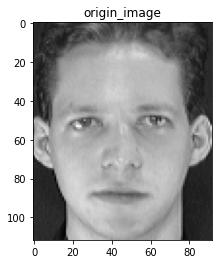

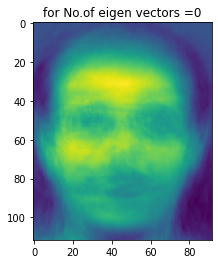

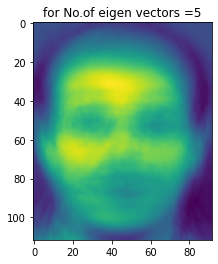

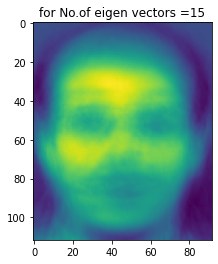

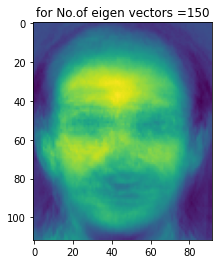

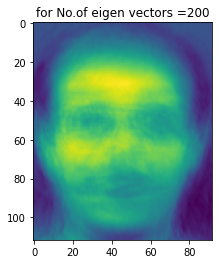

In [ ]:
# Write code for Question 4 here 
image1 = cv.imread("/content/drive/MyDrive/ml/Labsheet 5/face_input_2.pgm")
image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
image1 = image1/255.0

plt.imshow(image1, "gray")
plt.title("origin_image")
plt.show()

image_with_mean1 = image.reshape((1,image.shape[0]*image.shape[1]))
image_mean_center1 = image_with_mean1 - mean
vec = [0,5,15,150,200]
c = 0
for i in vec:
  for j in range(i):
    x1=np.zeros((112,92))
    x1 = x1+np.dot(image_mean_center1,sorted_eigenvectors[:,j])*(sorted_eigenvectors[:,[j]].reshape((112,92)))
    c += 1
  plt.figure(c)
  plt.imshow(x1+np.reshape(mean,(112,92)))
  plt.title(f"for No.of eigen vectors ={i}")


###Inference 
As no.of eigen vectors increases picture clarity reduces

##References
PCA and FDA class ppt